<h1 align= center> Iris Petel Prediction </h1>

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:


* sepal_length
* sepal_width
* petal_length
* petal_width
* species


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Read The Dataset

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/iris.csv')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Perfom EDA

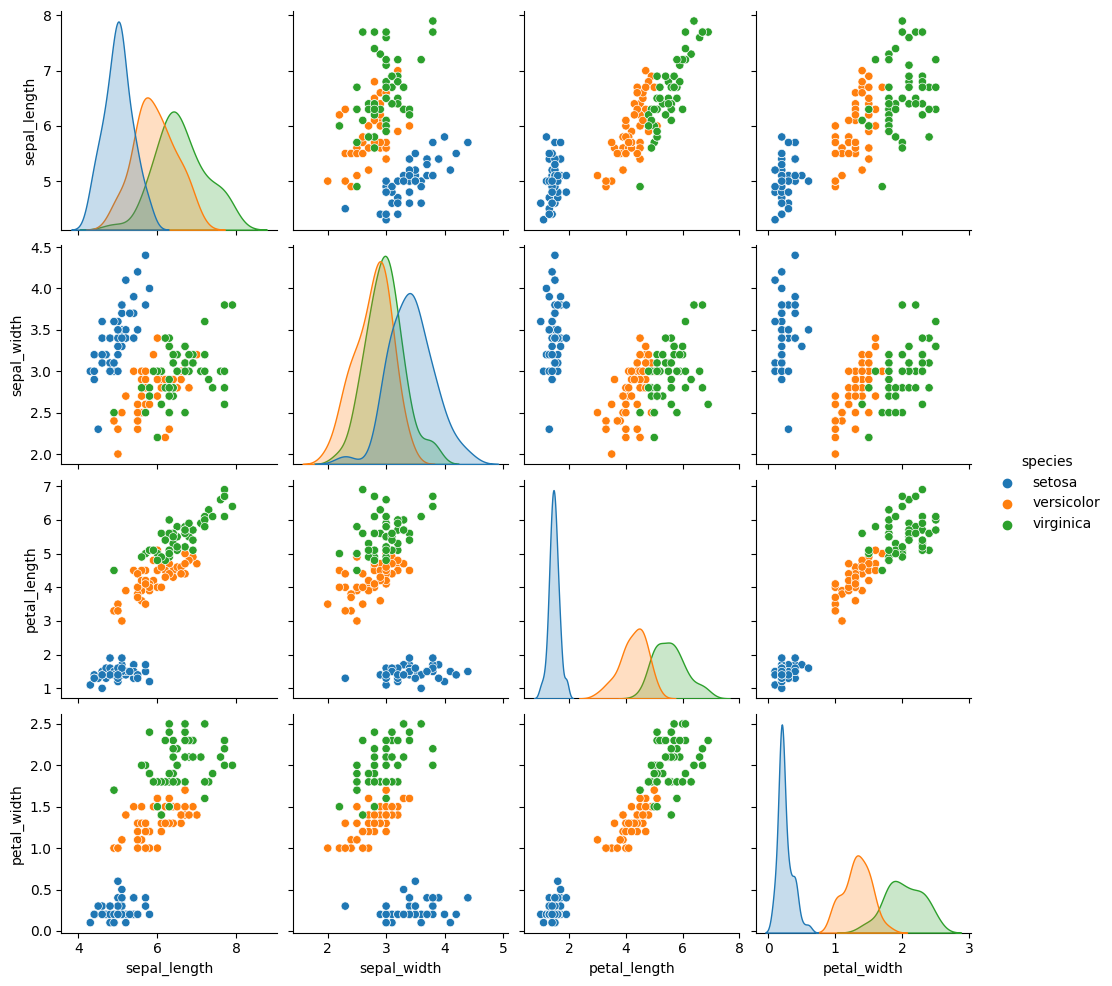

In [10]:
sns.pairplot(data=df, hue='species')

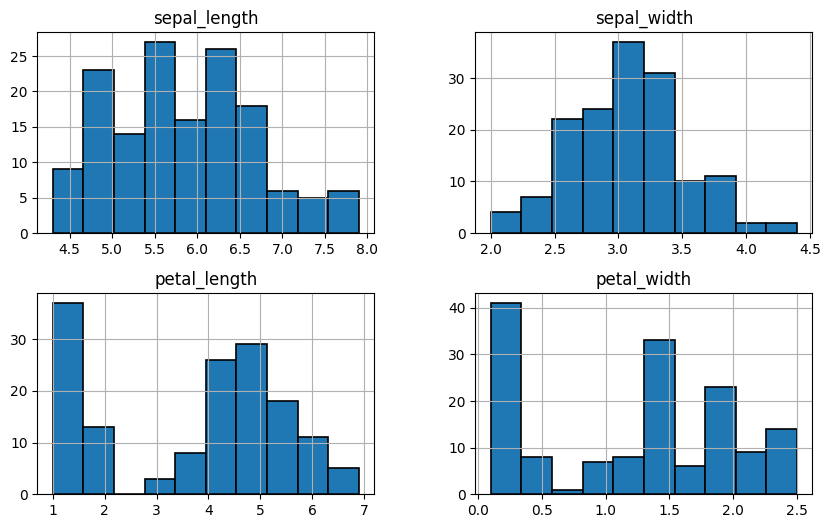

In [14]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

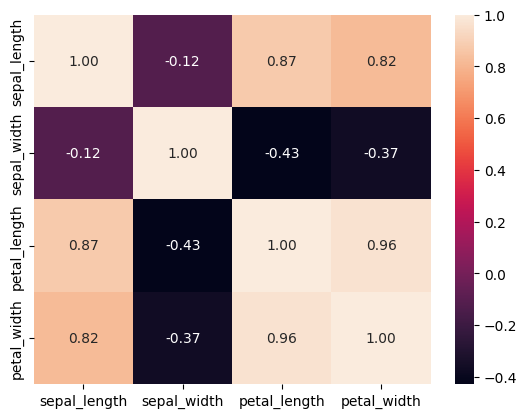

In [18]:
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(data=correlation_matrix,annot=True, fmt='.2f')
plt.show()

# Seperate the X and Y Features

In [49]:
X = df.drop(labels=['species'],axis=1)
Y = df[['species']]

In [50]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['species']=le.fit_transform(Y['species'])

In [53]:
Y['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

# # Apply Preprocessing pipeline on X fratures

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [55]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [56]:
X_pre = num_pipe.fit_transform(X)

In [57]:
X_pre

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [58]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [59]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [60]:
# Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.33,random_state=21)

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Evaluaton

In [66]:
dtc.score(xtrain,ytrain)

1.0

In [67]:

dtc.score(xtest,ytest)

0.94

# Tune the Hyper Parameters
1. Max_depth
2. minimum sample_split
3. min_sample_split
4. criterion (gini, entropy)

In [68]:
params = {'max_depth':[2,3,4,5,6],
          'min_samples_split':[4,5,6,7,8],
          'criterion':['gini','entropy']}

In [69]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=42)
gscv = GridSearchCV(model,param_grid= params,cv=5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [4, 5, 6, 7, 8]},
             scoring='f1_macro')

In [70]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 4}

In [71]:

gscv.best_score_

1.0

In [72]:
best_dtc = gscv.best_estimator_

In [73]:
best_dtc 


DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=42)

In [74]:
best_dtc.score(xtrain,ytrain)

1.0

In [75]:
best_dtc.score(xtest,ytest)

0.94

# Visualize

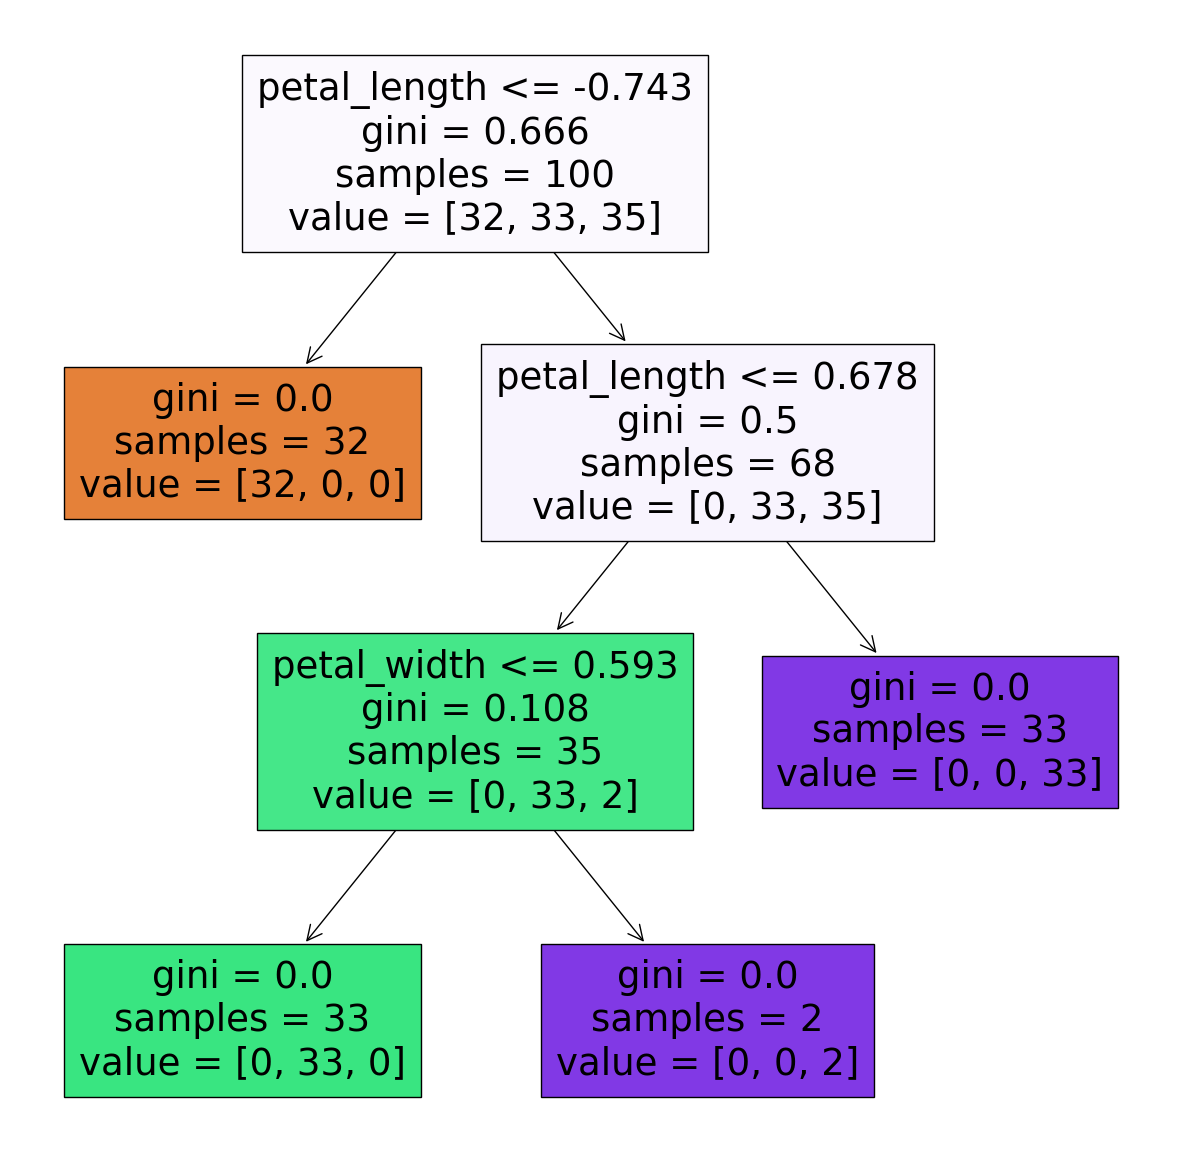

In [76]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plot_tree(best_dtc,filled=True,feature_names=list(xtrain.columns))
plt.show()

In [77]:
ytrain.value_counts()

species
2          35
1          33
0          32
Name: count, dtype: int64

# Evaluate Best Model on data

In [78]:
ypred_tr = best_dtc.predict(xtrain)
ypred_ts = best_dtc.predict(xtest)

In [79]:
ypred_tr

array([1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2,
       1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1,
       2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1])

In [80]:
ypred_ts

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 1, 0])

# Confusion Matrix 

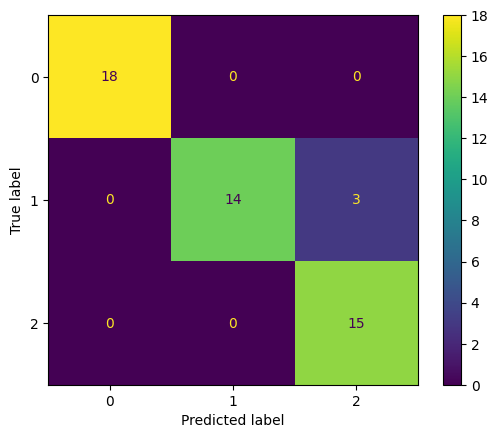

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_dtc.classes_)
cfd.plot()

# Clasification Report

In [84]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.82      0.90        17
           2       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



In [85]:
# Getting the Original lables.

In [86]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [88]:
ypred_tr_lb

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'ver

In [89]:
ypred_ts_lb

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa'], dtype=object)